# Basit Dogrusal Regresyon

### model

In [32]:
import pandas as pd

In [33]:
df =pd.read_csv("Advertising.csv")
df =df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


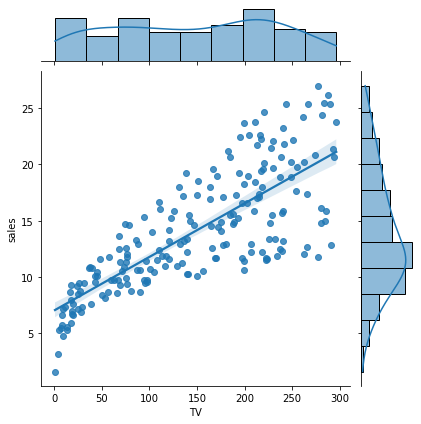

In [35]:
import seaborn as sns
sns.jointplot(x="TV", y="sales",data=df,kind="reg");

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
X = df[["TV"]]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [38]:
y = df[["sales"]]


In [39]:
X_1 = df.drop('sales',axis=1)
y_1 = df[["sales"]]
y_1.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [40]:
#modellerin kurulması
reg = LinearRegression()
mreg = LinearRegression()

In [41]:
model_1=reg.fit(X,y)
model_2=mreg.fit(X_1,y_1)

In [57]:
model_1.intercept_ # B0 degeri

array([7.03259355])

In [58]:
model_2.intercept_ # B0 degeri

array([2.93888937])

In [59]:
model_1.coef_ # b1 degeri

array([[0.04753664]])

In [60]:
model_2.coef_ # b degerleri

array([[ 0.04576465,  0.18853002, -0.00103749]])

In [61]:
#rkare
model_1.score(X,y)

0.611875050850071

In [62]:
#rkare
model_2.score(X_1,y_1)

0.8972106381789522

### tahmin

In [45]:
import matplotlib.pyplot as plt


C:\Users\osman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


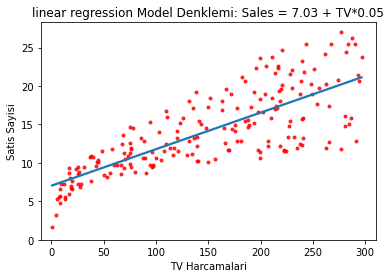

In [64]:
g = sns.regplot(df["TV"],df["sales"],ci=None,scatter_kws={'color':'r','s':9})

# ci : guven araligi
g.set_title("linear regression Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satis Sayisi")
g.set_xlabel("TV Harcamalari")
plt.xlim(-10,310)
plt.ylim(bottom=0);

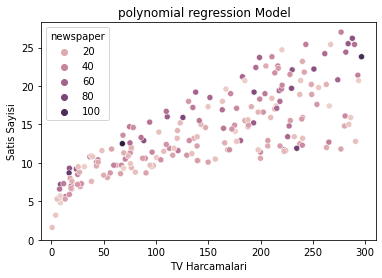

In [69]:
g = sns.scatterplot(x="TV",y="sales",hue="newspaper",ci=None,data=df)

# ci : guven araligi
g.set_title("polynomial regression Model  ")
g.set_ylabel("Satis Sayisi")
g.set_xlabel("TV Harcamalari")
plt.xlim(-10,310)
plt.ylim(bottom=0);

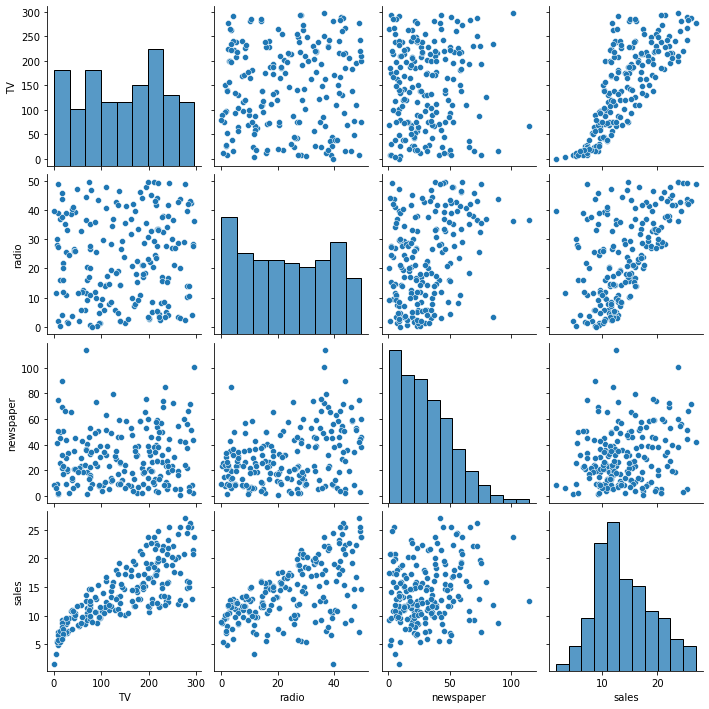

In [71]:
sns.pairplot(df)
#veriler arası ilişkiler

### Sales = 7,03 + 0,05*TV

In [47]:
7.03+0.05*165
#linear regression formulu

15.280000000000001

In [74]:
model_1.predict([[165]]) # tahmin etme

C:\Users\osman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[14.87613922]])

In [75]:
yeni_veri=[[30],[10],[40]]
yeni_veri=pd.DataFrame(yeni_veri).T
yeni_veri

,0,1,2
0,30,10,40


In [77]:
#polynomial regression fiyat tahmin
model_2.predict(yeni_veri)

C:\Users\osman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[6.15562918]])

## Model Tuning

### MSE : Hata Karaler Ortalamasi
### RMSE : Hata Kareler Ortalamasinin Karekökü

In [93]:
gercek_y= y[0:10] #polynomial -- linear gercek degerler

In [94]:
tahmin_edilen_y_linear=pd.DataFrame(model_1.predict(X)[0:10])

In [95]:
tahmin_edilen_y_polynomial=pd.DataFrame(model_2.predict(X_1)[0:10])

In [98]:
hatalar = pd.concat([gercek_y,tahmin_edilen_y_linear,tahmin_edilen_y_polynomial],axis=1)
hatalar.columns=["gercek_y","tahmin_edilen_y_linear","tahmin_edilen_y_polynomial"]
hatalar

,gercek_y,tahmin_edilen_y_linear,tahmin_edilen_y_polynomial
0,22.1,17.970775,20.523974
1,10.4,9.147974,12.337855
2,9.3,7.850224,12.307671
3,18.5,14.234395,17.597830
4,12.9,15.627218,13.188672
5,7.2,7.446162,12.478348
6,11.8,9.765950,11.729760
7,13.2,12.746498,12.122953
8,4.8,7.441409,3.727341
9,10.6,16.530414,12.550849


In [99]:
hatalar["hata_linear"]= hatalar["gercek_y"]-hatalar["tahmin_edilen_y_linear"]

hatalar["hata_polynomial"]= hatalar["gercek_y"]-hatalar["tahmin_edilen_y_polynomial"]

In [100]:
hatalar["hata_kareler_linear"] = hatalar["hata_linear"]**2
hatalar["hata_kareler_polynomial"] = hatalar["hata_polynomial"]**2

In [101]:
hatalar

,gercek_y,tahmin_edilen_y_linear,tahmin_edilen_y_polynomial,hata_linear,hata_polynomial,hata_kareler_linear,hata_kareler_polynomial
0,22.1,17.970775,20.523974,4.129225,1.576026,17.050503,2.483857
1,10.4,9.147974,12.337855,1.252026,-1.937855,1.567569,3.755281
2,9.3,7.850224,12.307671,1.449776,-3.007671,2.101851,9.046084
3,18.5,14.234395,17.597830,4.265605,0.902170,18.195390,0.813912
4,12.9,15.627218,13.188672,-2.727218,-0.288672,7.437719,0.083331
5,7.2,7.446162,12.478348,-0.246162,-5.278348,0.060596,27.860954
6,11.8,9.765950,11.729760,2.034050,0.070240,4.137358,0.004934
7,13.2,12.746498,12.122953,0.453502,1.077047,0.205664,1.160030
8,4.8,7.441409,3.727341,-2.641409,1.072659,6.977040,1.150598
9,10.6,16.530414,12.550849,-5.930414,-1.950849,35.169814,3.805811


In [102]:
import numpy as np
np.mean(hatalar["hata_kareler_linear"])

9.290350329638105

In [103]:
np.mean(hatalar["hata_kareler_polynomial"])

5.0164790177932845

Bu veri setinde polynomial regression modeli açık ara linear regression modelin çok daha iyi bir hata ortalaması verir.
